# **Geopandas - esercizio in preparazione alla verifica**

Prendere in considerazione il dataset contenente le informazioni sui quartieri di Milano (allegato al presente post) e:
1. caricare i quartieri in un geodataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 417 kB/s 


In [ ]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - esercizio in preparazione alla verifica (1)/ds964_nil_wm/NIL_WM.dbf')
Quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - esercizio in preparazione alla verifica (1)/ds964_nil_wm')
Quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


2. visualizzare l'intestazione

In [ ]:
Quartieri.head()

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."


3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico

In [ ]:
Quartieri.sort_values(by=['NIL'], inplace = True)
Quartieri


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
65,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11963.033873,3.471750e+06,154,"POLYGON ((9.09315 45.46938, 9.09393 45.46802, ..."
57,52,BANDE NERE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6776.458948,2.663780e+06,146,"POLYGON ((9.12727 45.46894, 9.12874 45.46840, ..."
...,...,...,...,...,...,...,...,...,...
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((9.26378 45.43251, 9.26384 45.43248, ..."
44,28,UMBRIA - MOLISE - CALVAIRATE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4912.251168,1.192352e+06,133,"POLYGON ((9.22392 45.45969, 9.22392 45.45934, ..."
38,38,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127,"POLYGON ((9.20060 45.43608, 9.20429 45.43642, ..."
27,71,VILLAPIZZONE - CAGNOLA - BOLDINASCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8375.003494,3.426941e+06,116,"POLYGON ((9.16204 45.49690, 9.16012 45.49570, ..."


4. visualizzare tutti i quartieri su una mappa di Milano

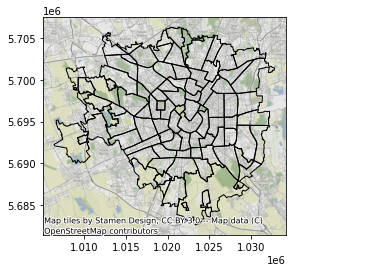

In [ ]:
import contextily
ax= Quartieri.to_crs(epsg=3857).plot(edgecolor='k',facecolor='none')

ctx.add_basemap(ax)

5. cercare il quartiere che contiene il Duomo di Milano

In [ ]:
from shapely.geometry import Point
Duomo =  Point(9.191383,45.464211)

In [ ]:
Quartieri[Quartieri.contains(Duomo)]


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene

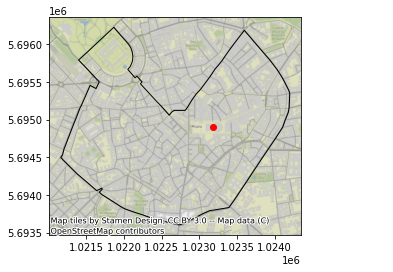

In [ ]:
ax= Quartieri[Quartieri.contains(Duomo)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='none')
geopandas.GeoSeries([Duomo], crs='EPSG:4326').to_crs(epsg=3857).plot(ax=ax, color='red')
ctx.add_basemap(ax)

7. visualizzare i quartieri vicini a quello che contiene il Duomo

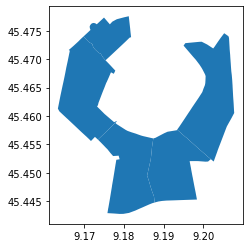

In [ ]:
QuartiereDuomo=Quartieri[Quartieri.contains(Duomo)]
Quartieri[Quartieri.touches(QuartiereDuomo.geometry.squeeze())].plot()

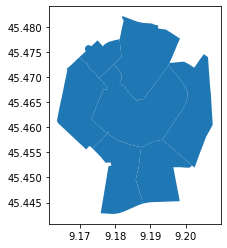

In [ ]:
QuartiereDuomo=Quartieri[Quartieri.contains(Duomo)]
Quartieri[Quartieri.intersects(QuartiereDuomo.geometry.squeeze())].plot()